# Introduction
* We are going to inspect various aspects of our gathered data with the goal of finding variables which are correlated to 'kd_ratio', in hopes to use them as features in a linear regression machine learning model.
* Something to note is the data from 'sample.csv' was gathered on February 20th, 2024.

In [21]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as pyplot
import seaborn

In [2]:
# Loading in data & displaying
data = pd.read_csv('sample.csv')
display(data)

,id,name,tag,url,rank,tier,ranked_rating,damage_per_round,kd_ratio,headshot_percent,...,dd_per_round,kills,deaths,assists,acs,kad_ratio,kills_per_round,first_bloods,flawless_rounds,aces
0,0,curry,#66666,https://tracker.gg/valorant/profile/riot/curry...,1,Radiant,1073,169.8,1.32,0.328,...,35.0,2237.0,1697.0,635.0,259.0,1.69,0.9,330.0,106.0,8.0
1,1,icy,#madi,https://tracker.gg/valorant/profile/riot/icy%2...,2,Radiant,1063,165.6,1.23,0.259,...,28.0,3264.0,2655.0,856.0,250.3,1.55,0.9,582.0,157.0,6.0
2,2,sen z,#5193,https://tracker.gg/valorant/profile/riot/sen%2...,3,Radiant,968,188.8,1.51,0.309,...,59.0,2119.0,1399.0,506.0,286.8,1.88,1.0,390.0,109.0,10.0
3,3,LEV Mazino,#ÐµÑÐ»Ð¸,https://tracker.gg/valorant/profile/riot/LEV%2...,4,Radiant,965,162.7,1.32,0.320,...,34.0,2866.0,2176.0,1087.0,244.6,1.82,0.9,256.0,144.0,4.0
4,4,C9 LF SARANG ì¬ë,#ALONE,https://tracker.gg/valorant/profile/riot/C9%20...,5,Radiant,908,180.9,1.38,0.297,...,37.0,5497.0,3987.0,1239.0,282.6,1.69,1.0,924.0,249.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,5495,dinonuggies9628,#yummy,https://tracker.gg/valorant/profile/riot/dinon...,6073,Immortal,5,177.3,1.43,0.336,...,44.0,1183.0,830.0,402.0,270.1,1.91,0.9,122.0,47.0,4.0
5414,5496,rei,#exe,https://tracker.gg/valorant/profile/riot/rei%2...,6074,Immortal,5,159.3,1.17,0.284,...,21.0,741.0,634.0,216.0,234.9,1.51,0.8,85.0,37.0,2.0
5415,5497,poopyHead,#nhart,https://tracker.gg/valorant/profile/riot/poopy...,6075,Immortal,5,161.3,1.16,0.213,...,21.0,2665.0,2289.0,723.0,243.9,1.48,0.8,418.0,118.0,4.0
5416,5498,Thomas,#5147,https://tracker.gg/valorant/profile/riot/Thoma...,6076,Immortal,5,143.8,1.05,0.184,...,9.0,2780.0,2658.0,1186.0,217.0,1.49,0.7,237.0,143.0,2.0


In [3]:
# Lets check our data types and look for missing data.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5418 entries, 0 to 5417
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5418 non-null   int64  
 1   name              5418 non-null   object 
 2   tag               5418 non-null   object 
 3   url               5418 non-null   object 
 4   rank              5418 non-null   int64  
 5   tier              5418 non-null   object 
 6   ranked_rating     5418 non-null   int64  
 7   damage_per_round  5418 non-null   float64
 8   kd_ratio          5418 non-null   float64
 9   headshot_percent  5418 non-null   float64
 10  win_percent       5418 non-null   float64
 11  wins              5418 non-null   float64
 12  kast              5418 non-null   float64
 13  dd_per_round      5418 non-null   float64
 14  kills             5418 non-null   float64
 15  deaths            5418 non-null   float64
 16  assists           5418 non-null   float64


In [4]:
# Now lets look at some summary statistics:
print(data.describe(include='all'))
# The following columns are truncated in the first output, so we print again:
print(data[['win_percent', 'wins', 'kast']].describe(include='all'))

                 id  name   tag  \
count   5418.000000  5418  5418   
unique          NaN  5303  3859   
top             NaN  john  #NA1   
freq            NaN     5   153   
mean    2729.676264   NaN   NaN   
std     1582.313503   NaN   NaN   
min        0.000000   NaN   NaN   
25%     1356.250000   NaN   NaN   
50%     2728.500000   NaN   NaN   
75%     4094.750000   NaN   NaN   
max     5499.000000   NaN   NaN   

                                                      url         rank  \
count                                                5418  5418.000000   
unique                                               5418          NaN   
top     https://tracker.gg/valorant/profile/riot/curry...          NaN   
freq                                                    1          NaN   
mean                                                  NaN  2990.763197   
std                                                   NaN  1759.090091   
min                                                   NaN    

## Initial Remarks
We can see many variables we may want to use as features for predicting 'kd_ratio'. We will avoid the variables 'kills', 'deaths', 'kad_ratio', and 'assists' as they directly relate to 'kd_ratio'. Next, we will begin exploratory data analysis. Some quick summary statistics to note:
* 'kd_ratio' has a mean of 1.072145 with a standard deviation of 0.119840.
* This dataset contains data for ranked players from rank 1 to rank 6077.
* Variables like 'acs', 'dd_per_round', 'headshot_percent', 'ranked_rating', 'win_percent', 'kast', and 'damage_per_round' may be worth looking into.

# Exploratory Data Analysis
Lets begin to look at different variables, their distributions, and how they relate to 'kd_ratio'.

[]

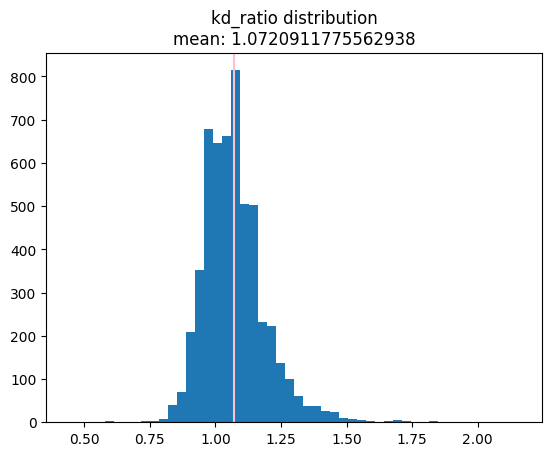

In [5]:
# First lets observe the distribution of kd_ratio.
kd_ratio_mean = np.mean(data.kd_ratio)
pyplot.hist(data=data, x='kd_ratio', bins=50)
pyplot.title(f'kd_ratio distribution\nmean: {kd_ratio_mean}')
pyplot.axvline(x=kd_ratio_mean).set_color('pink')
pyplot.plot()

## Average Combat Score ('acs')
Average combat score is the total number of points for a match, divided by the number of rounds played.
Lets have a look at how 'acs' compares to 'kd_ratio'.

[]

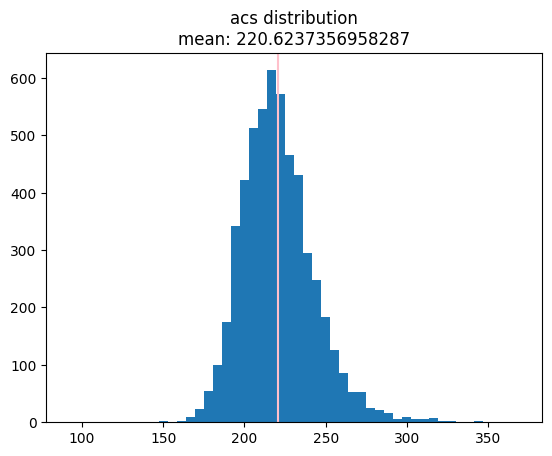

In [6]:
# Next lets have a look at acs (average combat score).
acs_mean = np.mean(data.acs)
pyplot.hist(data=data, x='acs', bins=50)
pyplot.title(f'acs distribution\nmean: {acs_mean}')
pyplot.axvline(x=acs_mean).set_color('pink')
pyplot.plot()

[]

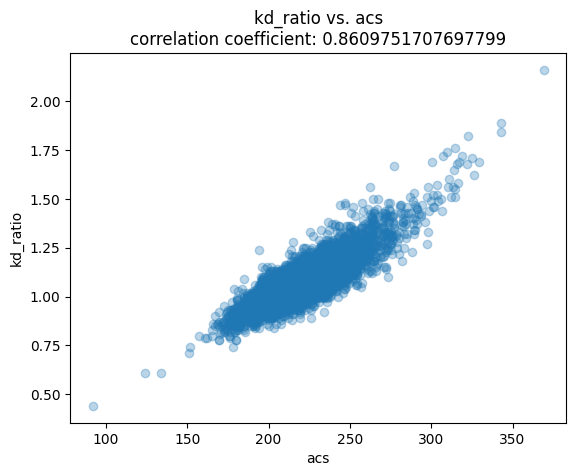

In [7]:
# Next lets see how acs relates to kd_ratio.
acs_kd_ratio_cor_coef = scipy.pearsonr(x=data.acs, y=data.kd_ratio)[0]
pyplot.scatter(x=data.acs, y=data.kd_ratio, alpha=.3)
pyplot.title(f"kd_ratio vs. acs\ncorrelation coefficient: {acs_kd_ratio_cor_coef}")
pyplot.xlabel('acs')
pyplot.ylabel('kd_ratio')
pyplot.plot()

## Delta Damage Per Round ('dd_per_round')
Delta damage per round is a measure of a players total damage difference. Delta damage per round follows the equation: ([dealt damage] - [recieved damage]) / [rounds played]. Lets have a look at 'dd_per_round'.

[]

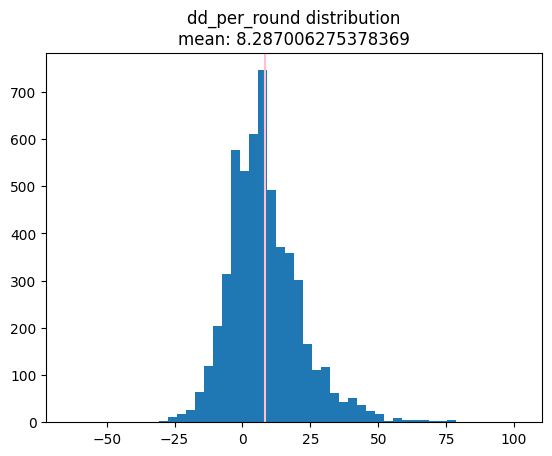

In [8]:
# Now a look at dd_per_round (delta damage per round).
dd_per_round_mean = np.mean(data.dd_per_round)
pyplot.hist(data=data, x='dd_per_round', bins=50)
pyplot.title(f'dd_per_round distribution\nmean: {dd_per_round_mean}')
pyplot.axvline(x=dd_per_round_mean).set_color('pink')
pyplot.plot()

[]

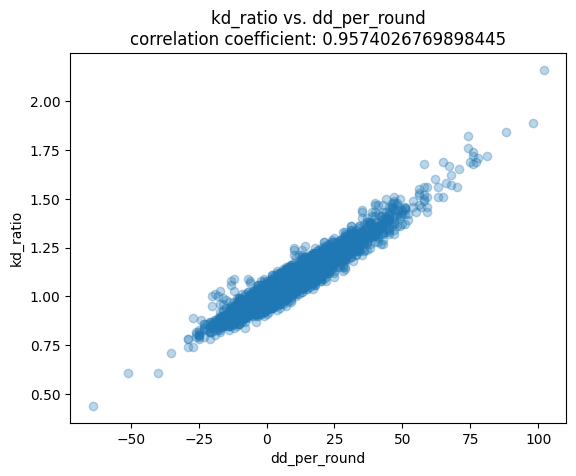

In [9]:
# Lets see how dd_per_round relates to kd_ratio
dd_per_round_kd_ratio_cor_coef = scipy.pearsonr(x=data.dd_per_round, y=data.kd_ratio)[0]
pyplot.scatter(x=data.dd_per_round, y=data.kd_ratio, alpha=.3)
pyplot.title(f"kd_ratio vs. dd_per_round\ncorrelation coefficient: {dd_per_round_kd_ratio_cor_coef}")
pyplot.xlabel('dd_per_round')
pyplot.ylabel('kd_ratio')
pyplot.plot()

## Headshot % ('headshot_percent')
Headshot % is the percentage of a players total shots which were headshots. Lets see if 'headshot_percent' relates to 'kd_ratio'.

[]

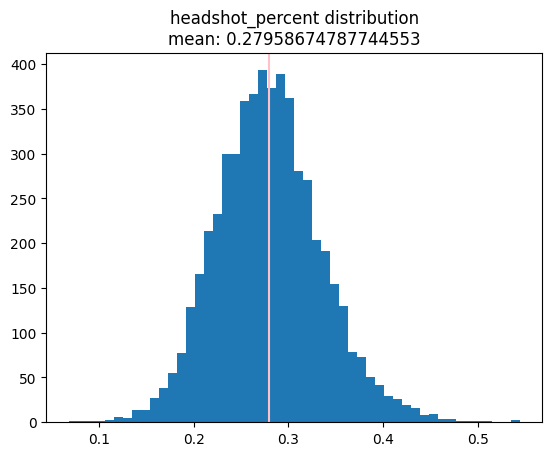

In [10]:
# Lets have a look at the distribution of headshot_percent
headshot_percent_mean = np.mean(data.headshot_percent)
pyplot.hist(data=data, x='headshot_percent', bins=50)
pyplot.title(f'headshot_percent distribution\nmean: {headshot_percent_mean}')
pyplot.axvline(x=headshot_percent_mean).set_color('pink')
pyplot.plot()

[]

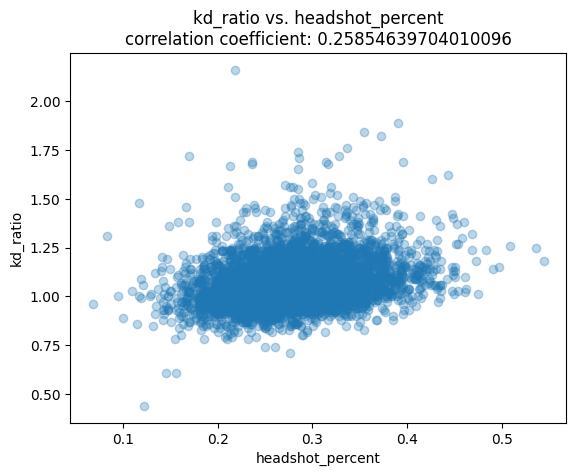

In [11]:
# Lets see how headshot_percent relates to kd_ratio
headshot_percent_kd_ratio_cor_coef = scipy.pearsonr(x=data.headshot_percent, y=data.kd_ratio)[0]
pyplot.scatter(x=data.headshot_percent, y=data.kd_ratio, alpha=.3)
pyplot.title(f"kd_ratio vs. headshot_percent\ncorrelation coefficient: {headshot_percent_kd_ratio_cor_coef}")
pyplot.xlabel('headshot_percent')
pyplot.ylabel('kd_ratio')
pyplot.plot()

## Win Percent ('win_percent')
Win percent may be a decent statistic to compare with 'kd_ratio'. Lets see:

[]

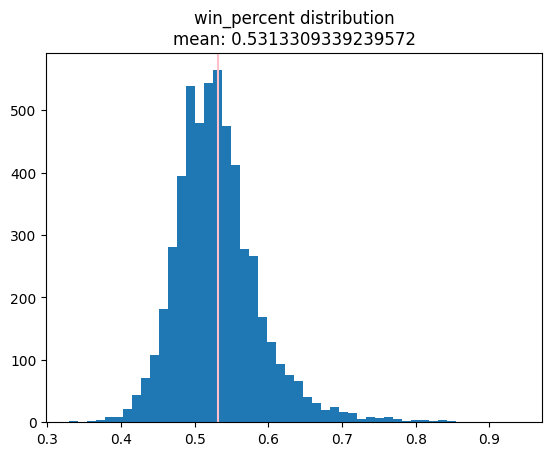

In [12]:
# Lets take a look at the distribution of win_percent:
win_percent_mean = np.mean(data.win_percent)
pyplot.hist(data=data, x='win_percent', bins=50)
pyplot.title(f'win_percent distribution\nmean: {win_percent_mean}')
pyplot.axvline(x=win_percent_mean).set_color('pink')
pyplot.plot()

[]

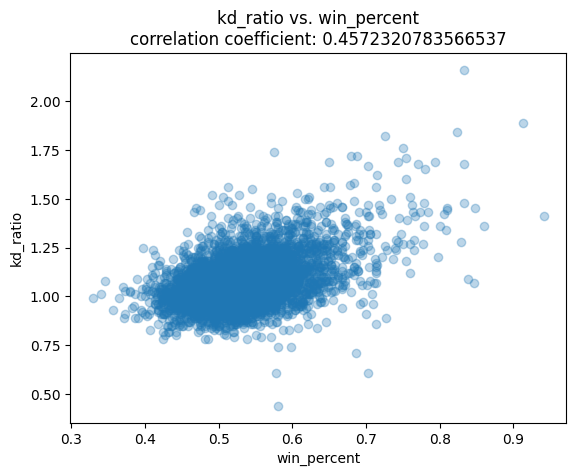

In [13]:
# Lets see how win_percent relates to kd_ratio
win_percent_kd_ratio_cor_coef = scipy.pearsonr(x=data.win_percent, y=data.kd_ratio)[0]
pyplot.scatter(x=data.win_percent, y=data.kd_ratio, alpha=.3)
pyplot.title(f"kd_ratio vs. win_percent\ncorrelation coefficient: {win_percent_kd_ratio_cor_coef}")
pyplot.xlabel('win_percent')
pyplot.ylabel('kd_ratio')
pyplot.plot()

## Kills, Assists, Survived, and Traded ('kast')
KAST measures the percentage of rounds where a player contributes by killing an enemy, assisting a teammate, surviving a round or getting revenge on an enemy for killing a teammate, known as trading. Lets take a look at how 'kast' relates to 'kd_ratio'.

[]

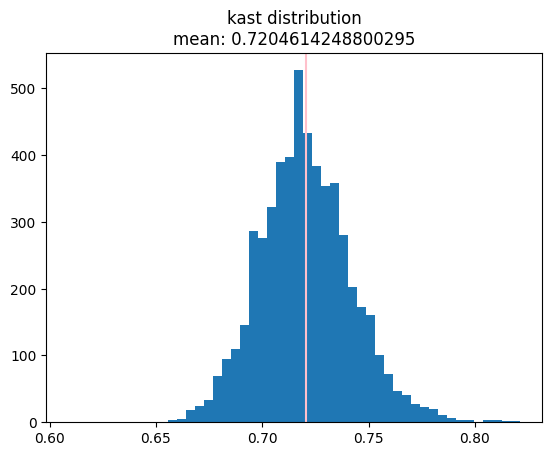

In [14]:
# Lets take a look at the distribution of kast:
kast_mean = np.mean(data.kast)
pyplot.hist(data=data, x='kast', bins=50)
pyplot.title(f'kast distribution\nmean: {kast_mean}')
pyplot.axvline(x=kast_mean).set_color('pink')
pyplot.plot()

[]

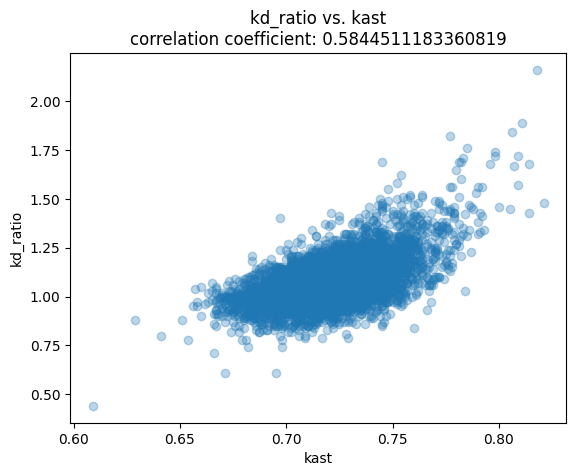

In [15]:
# Lets see how kast relates to kd_ratio
kast_kd_ratio_cor_coef = scipy.pearsonr(x=data.kast, y=data.kd_ratio)[0]
pyplot.scatter(x=data.kast, y=data.kd_ratio, alpha=.3)
pyplot.title(f"kd_ratio vs. kast\ncorrelation coefficient: {kast_kd_ratio_cor_coef}")
pyplot.xlabel('kast')
pyplot.ylabel('kd_ratio')
pyplot.plot()

## Damage Per Round ('damage_per_round')
Damage per round is a measure of a players average damage per round. Lets look for a correlation between 'damage_per_round' and 'kd_ratio'.

[]

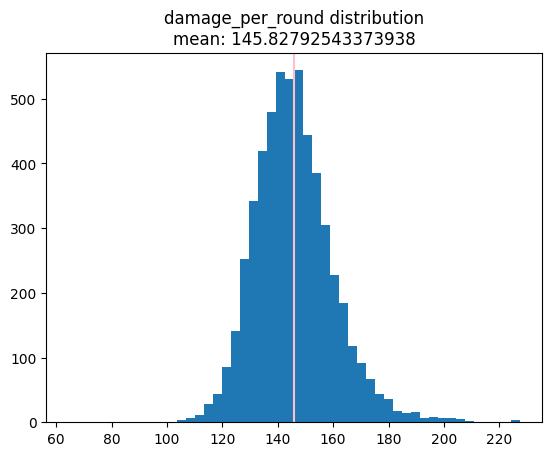

In [16]:
# Lets take a look at the distribution of damage_per_round:
damage_per_round_mean = np.mean(data.damage_per_round)
pyplot.hist(data=data, x='damage_per_round', bins=50)
pyplot.title(f'damage_per_round distribution\nmean: {damage_per_round_mean}')
pyplot.axvline(x=damage_per_round_mean).set_color('pink')
pyplot.plot()

[]

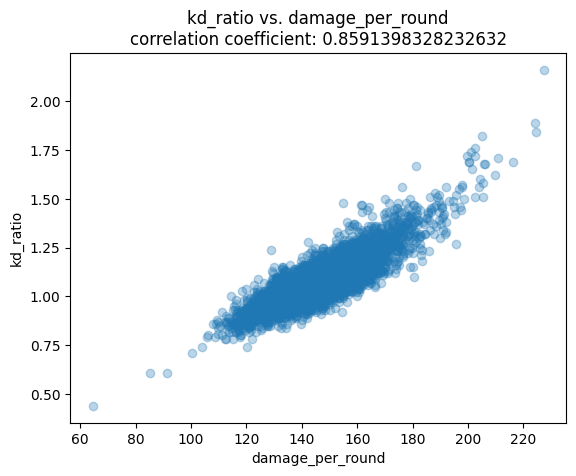

In [17]:
# Lets see how damage_per_round relates to kd_ratio
damage_per_round_kd_ratio_cor_coef = scipy.pearsonr(x=data.damage_per_round, y=data.kd_ratio)[0]
pyplot.scatter(x=data.damage_per_round, y=data.kd_ratio, alpha=.3)
pyplot.title(f"kd_ratio vs. damage_per_round\ncorrelation coefficient: {damage_per_round_kd_ratio_cor_coef}")
pyplot.xlabel('damage_per_round')
pyplot.ylabel('kd_ratio')
pyplot.plot()

## Ranked Rating ('ranked_rating')
Since ranked rating is unique to each player, lets simply view if there is a correlation between 'ranked_rating' and 'kd_ratio'.

[]

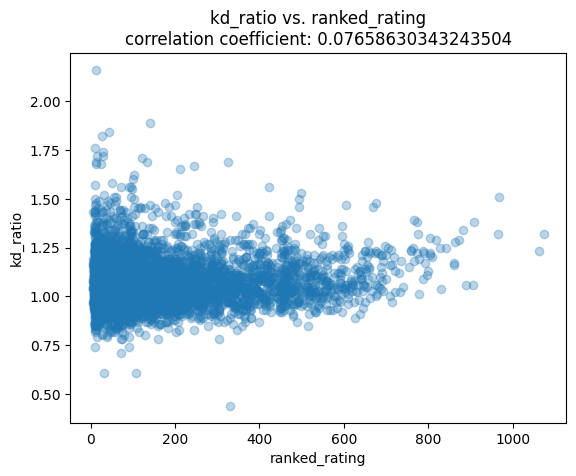

In [18]:
# Lets see how ranked_rating relates to kd_ratio
ranked_rating_kd_ratio_cor_coef = scipy.pearsonr(x=data.ranked_rating, y=data.kd_ratio)[0]
pyplot.scatter(x=data.ranked_rating, y=data.kd_ratio, alpha=.3)
pyplot.title(f"kd_ratio vs. ranked_rating\ncorrelation coefficient: {ranked_rating_kd_ratio_cor_coef}")
pyplot.xlabel('ranked_rating')
pyplot.ylabel('kd_ratio')
pyplot.plot()

# Conclusion
After looking at various variables against 'kd_ratio', we can conclude that closely correlated variables like 'acs', 'dd_per_round', and 'damage_per_round' are good features to use in a model for predicting 'kd_ratio' (all of which have a correlation coefficient greater than 80). Lets have one final check at our selected variables to observe if they have outliers:

[]

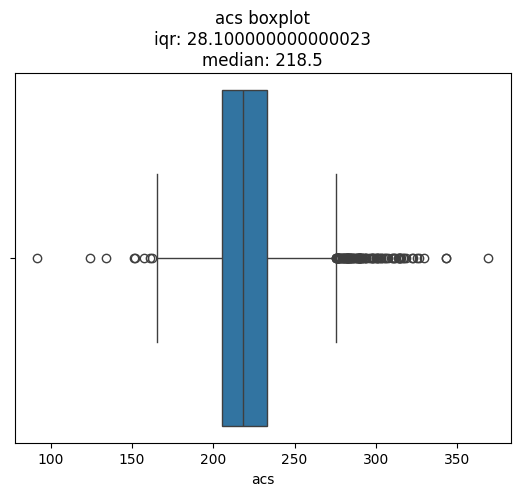

In [33]:
# Lets have another look at the distributions for our selected features, starting with acs.
acs_iqr = scipy.iqr(x=data.acs)
seaborn.boxplot(data=data, x='acs')
pyplot.title(f"acs boxplot\niqr: {acs_iqr}\nmedian: {data.acs.quantile(.5)}")
pyplot.plot()

[]

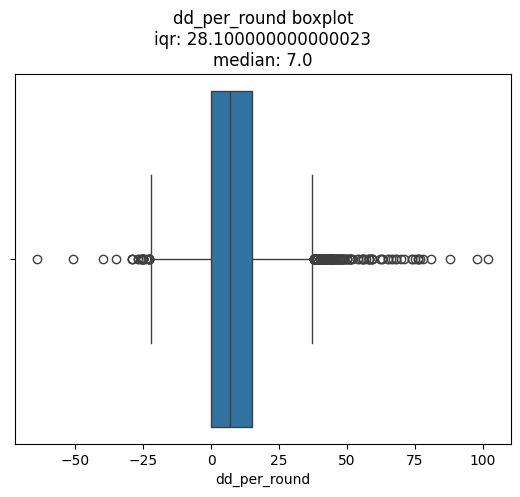

In [29]:
# Next, a look at dd_per_round
dd_per_round_iqr = scipy.iqr(x=data.dd_per_round)
seaborn.boxplot(data=data, x='dd_per_round')
pyplot.title(f"dd_per_round boxplot\niqr: {acs_iqr}\nmedian: {data.dd_per_round.quantile(.5)}")
pyplot.plot()

[]

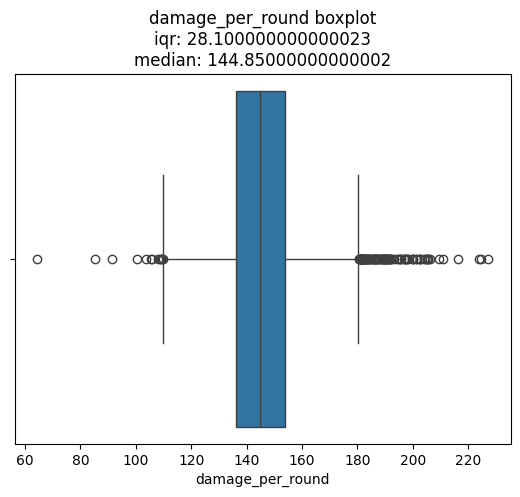

In [30]:
# Finally a look at damage_per_round
damage_per_round_iqr = scipy.iqr(x=data.damage_per_round)
seaborn.boxplot(data=data, x='damage_per_round')
pyplot.title(f"damage_per_round boxplot\niqr: {acs_iqr}\nmedian: {data.damage_per_round.quantile(.5)}")
pyplot.plot()